# Affine Transformation

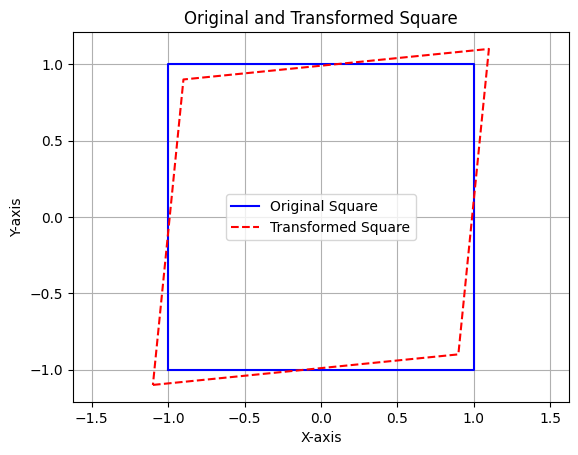

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

pts = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1], [-1, -1]]).T
pts = np.row_stack((pts, np.ones(pts.shape[1])))
# TODO: Transform, rotate and scale the points

# transformation Matrix
scale_factor = 1
rotation_angle = 0  # in degrees
shear_factor = .1






# Plot the transformed square
plt.plot(pts[0,:], pts[1,:], label='Original Square', color='blue')
plt.plot(transformed_pts[0,:], transformed_pts[1,:], label='Transformed Square', linestyle='dashed', color='red')

# Set plot properties
plt.title('Original and Transformed Square')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

# Affine Transformation of Image

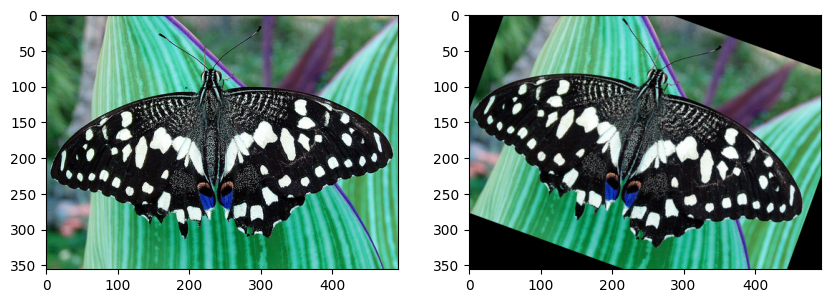

In [12]:
# Image Transformations
image = cv2.imread('butterfly.jpg')

# TODO: Transform, rotate and scale the points
# use cv2.warpPerspective to rotate and scale the image around the center of the image. 

# Define scale, rotation, and shear factors
scale_factor = 1
rotation_angle = 20  # in degrees
shear_factor = 0

# Create transformation matrices
scale_matrix = np.array([[scale_factor, 0, 0],
                        [0, scale_factor, 0],
                        [0, 0, 1]])

rotation_angle_rad = np.radians(rotation_angle)
rotation_matrix = np.array([[np.cos(rotation_angle_rad), -np.sin(rotation_angle_rad), 0],
                            [np.sin(rotation_angle_rad), np.cos(rotation_angle_rad), 0],
                            [0, 0, 1]])

shear_matrix = np.array([[1, shear_factor, 0],
                        [shear_factor, 1, 0],
                        [0, 0, 1]])
# Combine the matrices to get the homography matrix
affine_matrix = np.dot(shear_matrix, np.dot(rotation_matrix, scale_matrix))

if 0:
    # top-left pixel is the origin
    # Apply the transformation using warpPerspective
    output_image = cv2.warpPerspective(image, affine_matrix, (image.shape[1], image.shape[0]))

else:
    # Make center of image as the origin
    T_matrix = np.array([[1, 0, image.shape[1]/2],
                     [0, 1, image.shape[0]/2],
                     [0, 0, 1]])
    affine_matrix = np.dot(np.dot(T_matrix, affine_matrix), np.linalg.inv(T_matrix))
    output_image = cv2.warpPerspective(image, affine_matrix, (image.shape[1], image.shape[0]))

# Display the original and transformed images
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.imshow( image)
plt.subplot(122)
plt.imshow( output_image)

# Projective Transformation
A projective transformation, also known as a perspective transformation, is a geometric transformation that occurs when viewing a three-dimensional scene from a two-dimensional plane. This transformation preserves straight lines but does not necessarily preserve parallelism. 



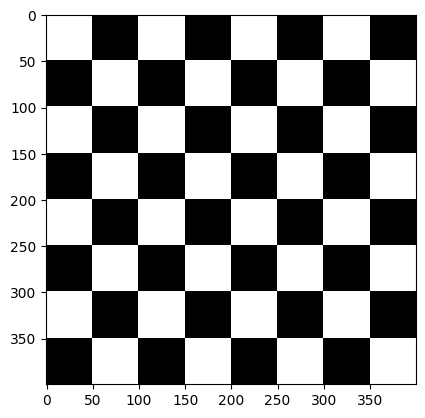

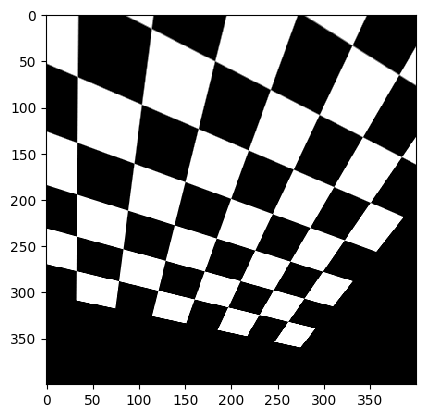

In [22]:
def create_checkerboard(rows, cols, square_size):
    checkerboard = np.zeros((rows*square_size, cols*square_size), dtype=np.uint8)

    for i in range(rows*square_size):
        for j in range(cols*square_size):
            if (i // square_size) % 2 == (j // square_size) % 2:
                checkerboard[i, j] = 255  # Set to white (255 in uint8)

    return checkerboard

rows, cols = 8, 8  # Number of rows and columns
square_size = 50   # Size of each square in pixels

checkerboard = create_checkerboard(rows, cols, square_size)

# Create Homography Matrix that includes projective tranformation

# Create a homography matrix
scale_factor = 1
rotation_angle = 20  # in degrees
# Create transformation matrices
scale_matrix = np.array([[scale_factor, 0, 0],
                        [0, scale_factor, 0],
                        [0, 0, 1]])
rotation_angle_rad = np.radians(rotation_angle)
rotation_matrix = np.array([[np.cos(rotation_angle_rad), -np.sin(rotation_angle_rad), 0],
                            [np.sin(rotation_angle_rad), np.cos(rotation_angle_rad), 0],
                            [0, 0, 1]])

# Combine the matrices to get the homography matrix
H = np.dot(rotation_matrix, scale_matrix)
H[2,:2] = np.array([0.001,0.002])
T_matrix = np.array([[1, 0, checkerboard.shape[1]/2],
                     [0, 1, checkerboard.shape[0]/2],
                     [0, 0, 1]])

H = np.dot(np.dot(T_matrix, H), np.linalg.inv(T_matrix))

# Apply the transformation using warpPerspective
output_image = cv2.warpPerspective(checkerboard, H, (checkerboard.shape[1], checkerboard.shape[0]))

# Display the checkerboard using matplotlib
plt.imshow(checkerboard, cmap='gray', interpolation='nearest')
#plt.plot(pts1[:,0], pts1[:,1],'r+')
plt.show()
plt.imshow(output_image, cmap='gray', interpolation='nearest')

# Image Rectification
Rectifying the image to ensure it is aligned directly facing the camera

<img src="homograpy.jpg" alt="drawing" width="500"/>

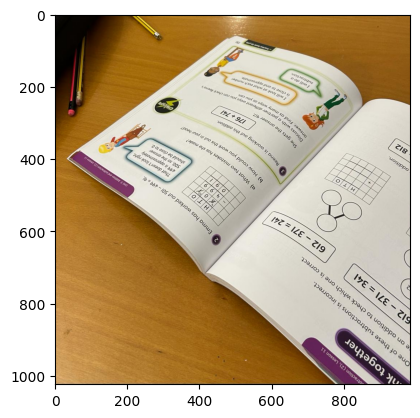

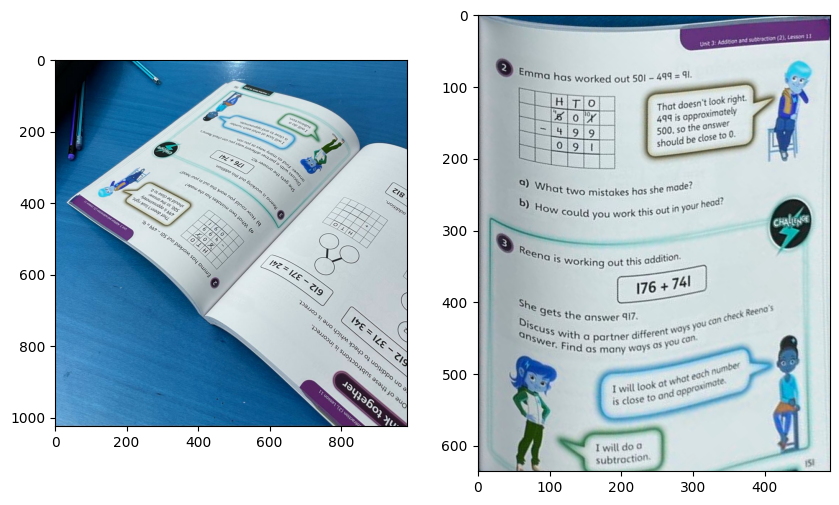

In [25]:
image = cv2.imread('book.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# pts = plt.ginput(4) 
pts = [(414, 718), #top-left
       (38, 402),  #top-right
       (851, 255), #bottom-left
       (493, 64)]  #bottom-right

input_pts = np.array(pts, dtype=np.float32)

width = (np.linalg.norm(input_pts[0]-input_pts[1]), np.linalg.norm(input_pts[2]-input_pts[3]))
height = (np.linalg.norm(input_pts[0]-input_pts[2]), np.linalg.norm(input_pts[1]-input_pts[3]))
width = int(np.max(width))
height = int(np.max(height))

# TODO Define the Homography matrix that rectifyies the image.
output_pts = np.array([(0, 0), 
          (width-1, 0),
          (0, height-1),
          (width-1,height-1)], np.float32)

# compute the homography matrix
H = cv2.getPerspectiveTransform(input_pts, output_pts)

# Apply Transformation
output_image = cv2.warpPerspective(image, H, (width, height), flags=cv2.INTER_LINEAR)

# Display the original and transformed images
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.imshow( image)
plt.subplot(122)
plt.imshow( output_image)

# Homography Matrix

A homography matrix is a 3×3 transformation matrix that describes a projective transformation between two images or planes. It is used to map points from one plane to another while preserving straight lines.

In [29]:
# Find the Homography Matrix between two image planes

image1 = cv2.imread('../../data/images/scene1.png')
image2 = cv2.imread('../../data/images/scene2.png')

# TODO
# Step 1: Find keypoints
# Step 2: Match keypoints
# step 3: Reject matched points based on NNR test
# Step 3: Find Homograph Matrix using the good matched points 
#         (you need 4 pairs of points to find the Homograph matrix)
#         use cv2.findHomography

feat = cv2.SIFT_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = feat.detectAndCompute(image1, None)
kp2, des2 = feat.detectAndCompute(image2, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

# Extract the matched keypoints
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Use RANSAC to estimate the homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=5)
